In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_segmentation_data.csv to customer_segmentation_data.csv


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customer_segmentation = pd.read_csv('/content/customer_segmentation_data.csv')

In [ ]:
customer_segmentation.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST00001,56,10000.00,5,12486.37,2,0
1,CUST00002,69,52757.74,1,15745.09,1,1
2,CUST00003,46,77007.67,1,17264.92,0,0
3,CUST00004,32,68584.20,3,13888.22,1,1
4,CUST00005,60,53144.89,1,20775.51,2,3


In [ ]:
customer_segmentation.isna().sum()

,0
Customer_ID,0
Age,0
Annual_Income,0
Policy_Count,0
Total_Premium_Paid,0
Claim_Frequency,0
Policy_Upgrades,0


In [ ]:
customer_segmentation.shape

(5000, 7)

In [ ]:
customer_segmentation.describe()

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,49655.494076,3.011800,15032.227268,1.525600,0.780200
std,17.906991,15074.928161,1.420023,4962.724732,1.230141,0.884785
min,18.000000,10000.000000,1.000000,1000.000000,0.000000,0.000000
25%,34.000000,39394.137500,2.000000,11615.515000,1.000000,0.000000
50%,49.000000,49664.480000,3.000000,15001.330000,1.000000,1.000000
75%,64.000000,59971.382500,4.000000,18398.217500,2.000000,1.000000
max,79.000000,108893.570000,5.000000,32093.060000,9.000000,5.000000


In [ ]:
customer_segmentation.duplicated().sum()

np.int64(0)

In [ ]:
customer_segmentation.drop(columns=['Customer_ID'], inplace=True)

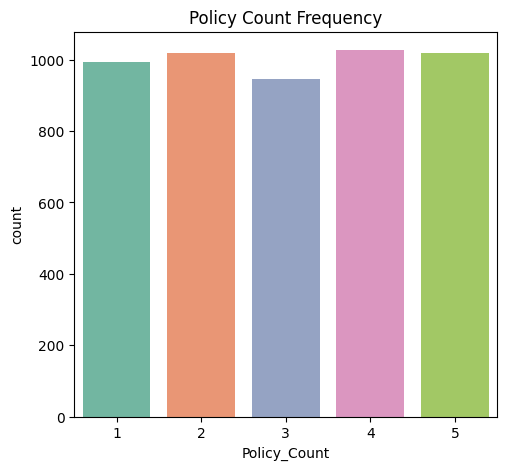

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=customer_segmentation['Policy_Count'], palette='Set2')
plt.title('Policy Count Frequency')
plt.show()

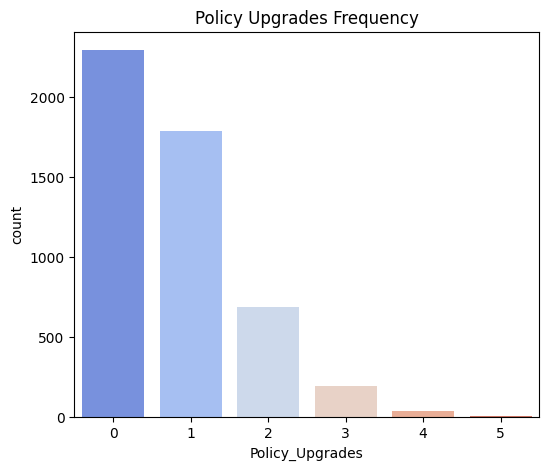

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x=customer_segmentation['Policy_Upgrades'], palette='coolwarm')
plt.title('Policy Upgrades Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_cols' is a list of numerical column names in your DataFrame
numerical_cols =['Age', 'Annual_Income',	'Policy_Count',	'Total_Premium_Paid',	'Claim_Frequency',	'Policy_Upgrades']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
customer_segmentation[numerical_cols] = scaler.fit_transform(customer_segmentation[numerical_cols])

# Print the scaled DataFrame (optional)
print(customer_segmentation.head())


  Customer_ID       Age  Annual_Income  Policy_Count  Total_Premium_Paid  \
0   CUST00001  0.401805      -2.630823      1.400259           -0.513047   
1   CUST00002  1.127851       0.205809     -1.416880            0.143658   
2   CUST00003 -0.156692       1.814596     -1.416880            0.449938   
3   CUST00004 -0.938588       1.255767     -0.008311           -0.230543   
4   CUST00005  0.625204       0.231493     -1.416880            1.157400   

   Claim_Frequency  Policy_Upgrades  
0         0.385685        -0.881884  
1        -0.427311         0.248447  
2        -1.240307        -0.881884  
3        -0.427311         0.248447  
4         0.385685         2.509109  


In [ ]:
import pickle

with open("scaler_segment.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
from sklearn.decomposition import PCA


# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(customer_segmentation[numerical_cols])


In [ ]:
# Save PCA Model
with open("pca_segment.pkl", "wb") as f:
    pickle.dump(pca, f)

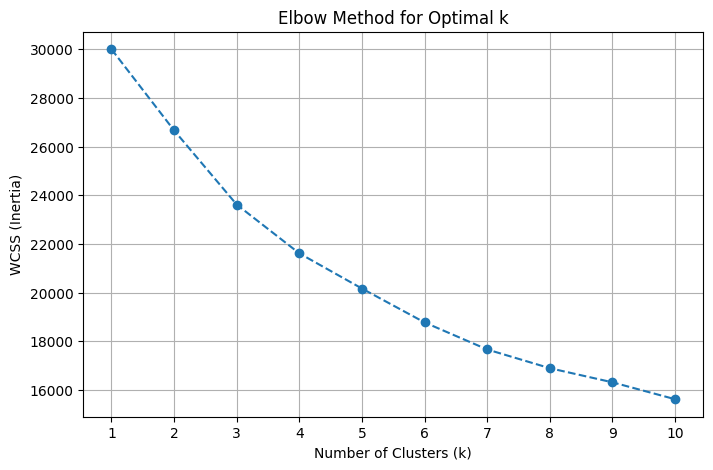

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df' with numerical columns
numerical_cols = ['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']


# Elbow Method for K-Means
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_segmentation[numerical_cols])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

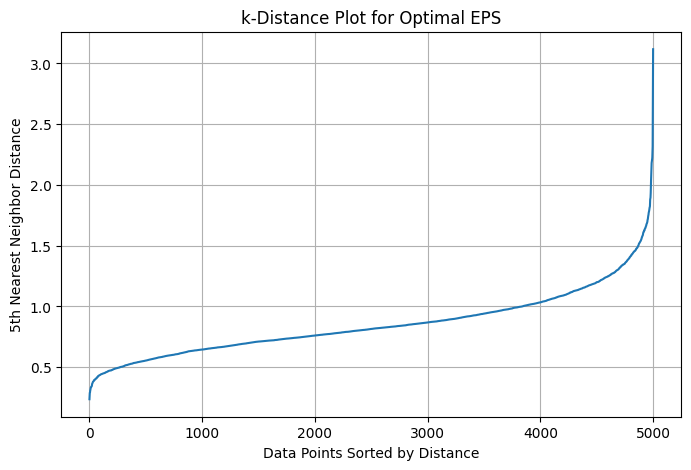

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Compute nearest neighbors distances
neighbors = NearestNeighbors(n_neighbors=5)  # min_samples=5 (default)
neighbors_fit = neighbors.fit(customer_segmentation[numerical_cols])
distances, _ = neighbors_fit.kneighbors(customer_segmentation[numerical_cols])

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Plot for Optimal EPS')
plt.grid()
plt.show()

K-Means Silhouette Score: 0.3305741530068455
DBSCAN Silhouette Score: 0.6801979895310084


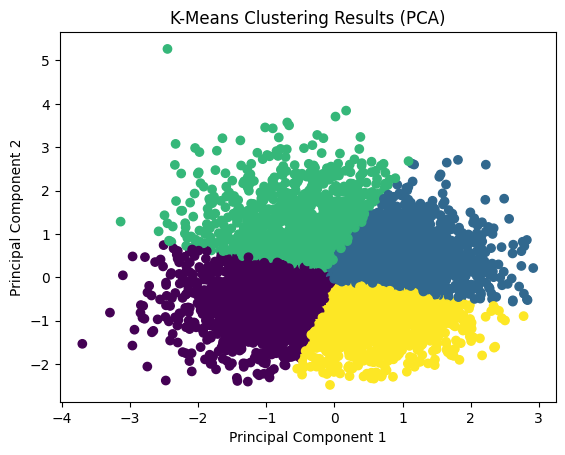

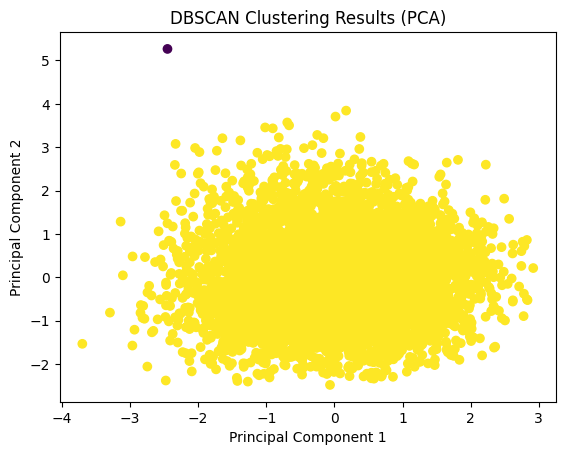

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42) # You might need to optimize the number of clusters
customer_segmentation['kmeans_segments'] = kmeans.fit_predict(pca_result)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=5) # Adjust eps and min_samples
customer_segmentation['dbscan_segments'] = dbscan.fit_predict(pca_result)

# Evaluate clustering (optional)
kmeans_silhouette = silhouette_score(pca_result, customer_segmentation['kmeans_segments'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
dbscan_silhouette = silhouette_score(pca_result, customer_segmentation['dbscan_segments'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Visualize clusters (example with K-Means)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=customer_segmentation['kmeans_segments'])
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize clusters (example with DBSCAN)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=customer_segmentation['dbscan_segments'])
plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
customer_segmentation

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,kmeans_segments,dbscan_segments
0,0.401805,-2.630823,1.400259,-0.513047,0.385685,-0.881884,1,0
1,1.127851,0.205809,-1.416880,0.143658,-0.427311,0.248447,3,0
2,-0.156692,1.814596,-1.416880,0.449938,-1.240307,-0.881884,0,0
3,-0.938588,1.255767,-0.008311,-0.230543,-0.427311,0.248447,0,0
4,0.625204,0.231493,-1.416880,1.157400,0.385685,2.509109,0,0
...,...,...,...,...,...,...,...,...
4995,-0.380091,0.077786,1.400259,-0.085513,-0.427311,-0.881884,1,0
4996,-0.547640,2.061584,0.695974,1.342321,0.385685,-0.881884,2,0
4997,-0.044993,-1.594719,1.400259,1.090748,-0.427311,-0.881884,1,0
4998,-0.826888,-0.531211,1.400259,1.890978,-0.427311,0.248447,0,0


In [ ]:
# Assigning Labels Based on Cluster Characteristics
def assign_kmeans_segment(label):
    cluster_labels = {
        0: "High-Value, High-Claim Customers",
        1: "Young and Growing Customers",
        2: "Senior Customers with High Premiums",
        3: "Low Engagement, Low-Risk Customers"
    }
    return cluster_labels.get(label, "Unknown")
customer_segmentation["KMeans_Segment_Label"] = customer_segmentation["kmeans_segments"].apply(assign_kmeans_segment)

In [ ]:
customer_segmentation

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,kmeans_segments,dbscan_segments,KMeans_Segment_Label
0,0.401805,-2.630823,1.400259,-0.513047,0.385685,-0.881884,1,0,Young and Growing Customers
1,1.127851,0.205809,-1.416880,0.143658,-0.427311,0.248447,3,0,"Low Engagement, Low-Risk Customers"
2,-0.156692,1.814596,-1.416880,0.449938,-1.240307,-0.881884,0,0,"High-Value, High-Claim Customers"
3,-0.938588,1.255767,-0.008311,-0.230543,-0.427311,0.248447,0,0,"High-Value, High-Claim Customers"
4,0.625204,0.231493,-1.416880,1.157400,0.385685,2.509109,0,0,"High-Value, High-Claim Customers"
...,...,...,...,...,...,...,...,...,...
4995,-0.380091,0.077786,1.400259,-0.085513,-0.427311,-0.881884,1,0,Young and Growing Customers
4996,-0.547640,2.061584,0.695974,1.342321,0.385685,-0.881884,2,0,Senior Customers with High Premiums
4997,-0.044993,-1.594719,1.400259,1.090748,-0.427311,-0.881884,1,0,Young and Growing Customers
4998,-0.826888,-0.531211,1.400259,1.890978,-0.427311,0.248447,0,0,"High-Value, High-Claim Customers"


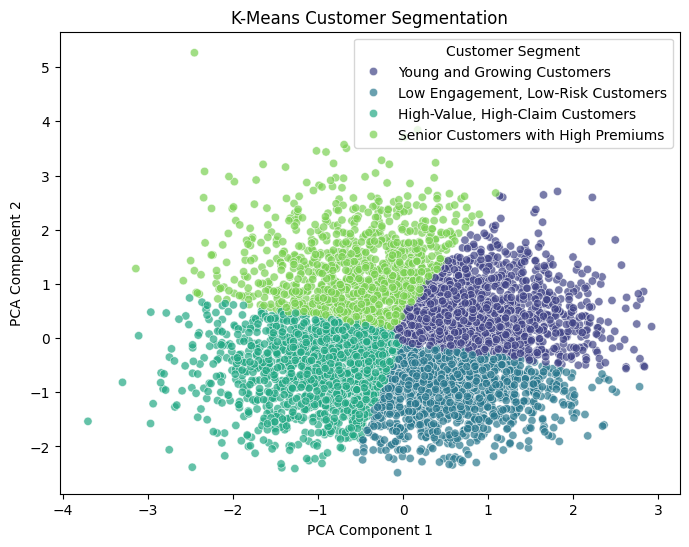

In [ ]:
# Assign meaningful labels to clusters
cluster_labels = {
    0: "High-Value, High-Claim Customers",
    1: "Young and Growing Customers",
    2: "Senior Customers with High Premiums",
    3: "Low Engagement, Low-Risk Customers"
}

# Convert numeric cluster labels to named labels
customer_segmentation["KMeans_Segment_Label"] = customer_segmentation["kmeans_segments"].map(cluster_labels)

# Scatter plot of K-Means clusters with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=customer_segmentation["KMeans_Segment_Label"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Customer Segmentation")
plt.legend(title="Customer Segment")
plt.show()

In [ ]:
import pickle

# Save K-Means Model
with open("kmeans_segment.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [ ]:
customer_segmentation.to_csv('customer_segmentation_clustered.csv', index=False)
from google.colab import files
files.download('customer_segmentation_clustered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>